In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
# Read the xls to dataframe by tabs
xls = pd.ExcelFile("/Users/leono1/Desktop/Submission/Data/Data.xls")
df1 = pd.read_excel(xls,'Soc_Dem')
df2 = pd.read_excel(xls,'Products_ActBalance')
df3 = pd.read_excel(xls, 'Inflow_Outflow')
df4 = pd.read_excel(xls, 'Sales_Revenues')

In [2]:
# The head of the data1
df1.head(5)
print(df1.shape)

(1615, 4)


In [3]:
# #Check missing variables
# print((df1[['Sex','Age','Tenure']]==0).sum())
# # Replace it by Average
# MA=round(df1['Age'].mean())
# MT=round(df1['Tenure'].mean())
# df1[['Tenure']]= df1[['Tenure']].replace(0, MT)
# print((df1[['Sex','Age','Tenure']]==0).sum())
# df1[['Tenure']]= df1[['Tenure']].replace(0, np.NaN)
# df1.dropna(inplace=True)
# print(df1.isnull().sum())
# print(df1.shape)

Text(0.92,800,'856')

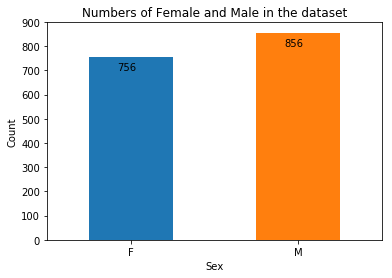

In [4]:
#Data Visualization
#Sex histogram
df1.groupby('Sex').size().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title('Numbers of Female and Male in the dataset')
count_f=df1.groupby('Sex').apply(lambda x: x[x=='F'].count())
count_m=df1.groupby('Sex').apply(lambda x: x[x=='M'].count())
plt.text(-0.08, 700, '756')
plt.text(0.92, 800,'856')


In [5]:
df1.groupby('Sex').count()
df1[['Age','Tenure']].describe()

,Age,Tenure
count,1615.000000,1615.000000
mean,42.848916,101.339938
std,18.550529,64.917297
min,0.000000,0.000000
25%,29.000000,44.000000
50%,41.000000,97.000000
75%,57.000000,151.000000
max,97.000000,273.000000


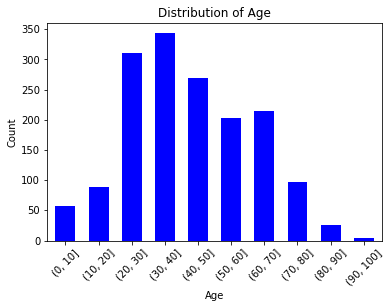

In [6]:
#Data Visualization
#Age histogram
bins = [0,10,20,30,40,50,60,70,80,90,100]
groups = df1.groupby(pd.cut(df1['Age'], bins)).count()
groups['Age'].plot.bar(width=0.6, color='Blue')
plt.xlabel('Age')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title('Distribution of Age')
count_f=df1.groupby('Age').apply(lambda x: x[x=='F'].count())
count_m=df1.groupby('Age').apply(lambda x: x[x=='M'].count())


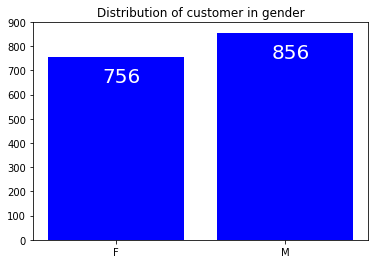

In [7]:
height = df1.groupby('Sex').size()
bins=['F','M']
width =0.5
x = np.arange(len(bins)) # the locatuibs fir the groups
# plt.bar(height=C_Sex)
plt.bar(x, height,color = 'blue')
plt.xticks(x,bins)
plt.text(-0.08,650,756,{'color':'w','fontsize':20})
plt.text(0.92,750,856,{'color':'w','fontsize':20})
plt.title('Distribution of customer in gender')
plt.show()

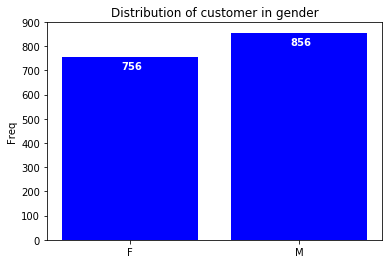

In [8]:
height = df1.groupby('Sex').size()
fig, ax = plt.subplots()
width = 0.45
bins=['F','M']
x = np.arange(len(bins))
# plt.bar(height=C_Sex)
ax.bar(x, height,color = 'blue')
ax.set_xticks(x)
ax.set_xticklabels(bins, minor=False)
ax.set_title('Distribution of customer in gender')
ax.set_xticklabels(bins)
ax.set_ylabel('Freq')
for i, v in enumerate(height):
    ax.text(i-0.05, v-50,str(v),color='w', fontweight='bold')



Text(0.5,1,'Distribution of Tenure')

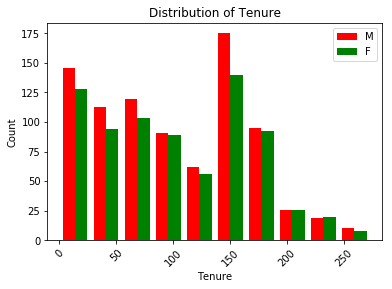

In [9]:
#Data Visualization
# bins = [0,30,60,90,120,150,180,210,240,270,300]
genders=['M','F']
colors = ['red','green']
# groups = df1.groupby(pd.cut(df1['Tenure'], bins)).count()
# groups['Tenure'].plot.bar(width=0.6, color='Blue')
plt.hist([df1.loc[df1['Sex'] == x, 'Tenure'] for x in genders], label=genders, color=colors)
plt.xlabel('Tenure')
plt.ylabel("Count")
plt.legend(['M','F'])
plt.xticks(rotation=45)
plt.title('Distribution of Tenure')

In [10]:
df2.head()

,Client,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
0,1,1,NaN,NaN,1.0,NaN,NaN,1333.802857,NaN,NaN,0.0,NaN,NaN
1,2,1,1.0,NaN,NaN,NaN,NaN,110.768571,13326.190357,NaN,NaN,NaN,NaN
2,3,1,NaN,1.0,NaN,NaN,NaN,482.654643,NaN,107.251786,NaN,NaN,NaN
3,4,1,1.0,NaN,NaN,1.0,NaN,1599.840714,76.437143,NaN,NaN,1110.381786,NaN
4,5,1,1.0,NaN,NaN,NaN,NaN,5353.483929,8079.715714,NaN,NaN,NaN,NaN


In [11]:
df3.head()

,Client,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,1017,0.005000,0.005000,1,1,118.046429,118.046429,25.000000,91.796429,0.000000,12,12,2,9,0
1,1456,364.772143,364.752857,4,3,774.980000,774.980000,14.285714,497.444286,258.607143,28,28,1,20,5
2,545,2471.719286,2471.719286,14,14,2190.257143,2190.257143,303.571429,179.082143,1229.428571,23,23,3,5,12
3,667,1127.792857,1127.792857,4,4,1344.603571,1344.603571,642.857143,194.285714,249.321429,21,21,3,4,8
4,1381,571.618214,571.618214,3,3,57.071429,57.071429,10.714286,46.357143,0.000000,6,6,1,5,0


In [12]:
# Merge the 4 datafram df1 to df4 by clients
df1.shape, df2.shape, df3.shape, df4.shape

((1615, 4), (1615, 13), (1587, 15), (969, 7))

In [13]:
#Sort the dataframe by clients
df1=df1.sort_values(by=['Client'])
df2=df2.sort_values(by=['Client'])
df3=df3.sort_values(by=['Client'])
df4=df4.sort_values(by=['Client'])
left=pd.merge(df1, df2, how='left',on=['Client'] )
right=pd.merge(df3, df4, how='left',on=['Client'] )
pd_new=pd.merge(left,right,how='left',on=['Client'])
Target_right=pd.merge(df3,df4,how='right',on=['Client'])
# 60% of the 1615 clients in the data and it will be used for training models
Target_train=pd.merge(left,Target_right,how='right',on=['Client']) 

In [14]:
# 40% of the 1615 clients in the data and using for prediction
result = pd.concat([pd_new,Target_train],ignore_index=True)
result.drop_duplicates(subset='Client',keep=False,inplace=True)

In [15]:
pd_new.head(5), 
Target_train.head(5),
Target_train.shape, result.shape

((969, 36), (646, 36))

In [16]:
#Create a new column and name it as Sex_num
pd_new['Sex_num']=pd_new.Sex.map({'F':1,'M':0})
#view the new column
pd_new.loc[0:5,['Sex','Sex_num']]

,Sex,Sex_num
0,F,1.0
1,M,0.0
2,M,0.0
3,M,0.0
4,F,1.0
5,F,1.0


In [17]:
Target_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 968
Data columns (total 36 columns):
Client                          969 non-null int64
Sex                             967 non-null object
Age                             969 non-null int64
Tenure                          969 non-null int64
Count_CA                        969 non-null int64
Count_SA                        265 non-null float64
Count_MF                        184 non-null float64
Count_OVD                       251 non-null float64
Count_CC                        110 non-null float64
Count_CL                        79 non-null float64
ActBal_CA                       969 non-null float64
ActBal_SA                       265 non-null float64
ActBal_MF                       184 non-null float64
ActBal_OVD                      251 non-null float64
ActBal_CC                       110 non-null float64
ActBal_CL                       79 non-null float64
VolumeCred                      951 non-null float64
Volum

In [18]:
Target_train[1:].corr()

,Client,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
Client,1.000000,0.000749,0.037668,0.000885,-0.078813,-0.094287,NaN,NaN,0.012899,0.024769,...,0.002141,-0.025322,0.056142,-0.014623,0.015615,-0.002420,0.045391,-0.059667,0.007253,0.054659
Age,0.000749,1.000000,-0.030997,0.031567,0.080523,-0.057785,NaN,NaN,-0.100226,-0.033128,...,0.014709,-0.017364,-0.001755,0.055239,-0.031411,0.049571,-0.175517,0.045176,0.027371,-0.130411
Tenure,0.037668,-0.030997,1.000000,0.025538,-0.015339,-0.021352,NaN,NaN,-0.113984,0.049787,...,0.027685,-0.013783,0.028539,0.022688,-0.003330,0.017099,0.176606,-0.004087,-0.000059,0.166521
Count_CA,0.000885,0.031567,0.025538,1.000000,0.037131,-0.071691,NaN,NaN,-0.097553,0.000487,...,-0.003647,-0.003932,-0.009935,-0.009629,0.004166,-0.031313,0.084483,0.002445,-0.021889,0.059126
Count_SA,-0.078813,0.080523,-0.015339,0.037131,1.000000,-0.065429,NaN,NaN,NaN,0.055249,...,-0.044705,-0.022403,-0.004298,-0.042140,-0.060335,0.001059,0.088445,0.151814,-0.027685,0.067905
Count_MF,-0.094287,-0.057785,-0.021352,-0.071691,-0.065429,1.000000,NaN,NaN,NaN,-0.003360,...,0.149954,-0.000900,0.152036,0.049871,0.289443,-0.089337,0.062244,0.132174,-0.038443,0.053036
Count_OVD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count_CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count_CL,0.012899,-0.100226,-0.113984,-0.097553,NaN,NaN,NaN,NaN,1.000000,-0.056519,...,0.009764,-0.038804,-0.039405,0.120548,-0.151749,-0.051686,0.140201,-0.090926,0.090742,0.158842
ActBal_CA,0.024769,-0.033128,0.049787,0.000487,0.055249,-0.003360,NaN,NaN,-0.056519,1.000000,...,0.076079,0.034239,0.073510,0.019703,-0.042691,0.166261,-0.054164,0.004508,0.009076,-0.023220


In [19]:
# Plot correlation matrix
def plot_corr(df,size=10):
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(size, size-2))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

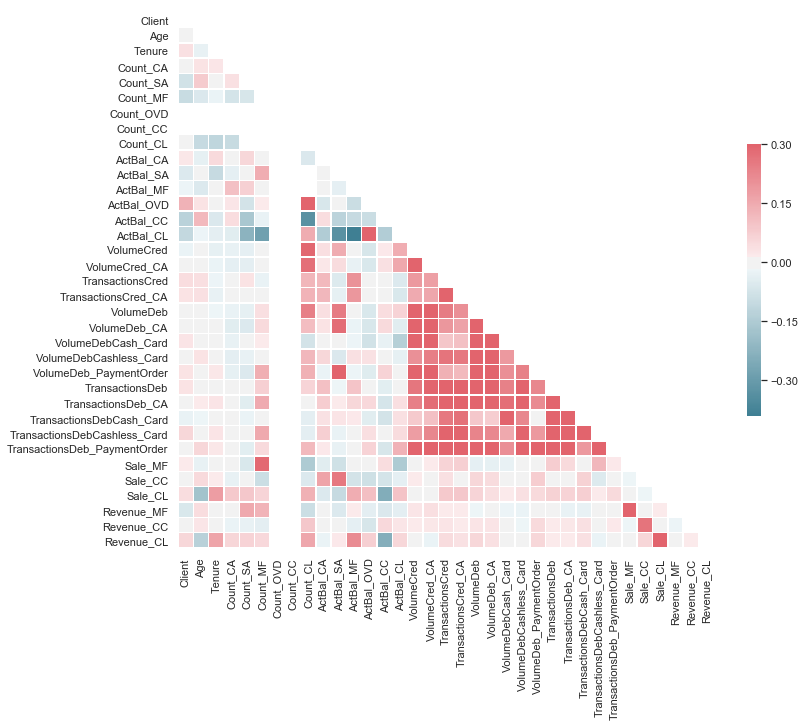

In [20]:
plot_corr(Target_train[1:],size=12)

In [21]:
# Mark zero for each missing variable or NaN
# pd_new[['Count_CA','Count_SA','Count_MF','Count_OVD','Count_CC','Count_CL',
#        'ActBal_CA','ActBal_SA','ActBal_MF','ActBal_CC','ActBal_CL','ActBal_OVD']]=pd_new[['Count_CA','Count_SA','Count_MF','Count_OVD','Count_CC','Count_CL',
#         'ActBal_CA','ActBal_SA','ActBal_MF','ActBal_CC','ActBal_CL','ActBal_OVD']].replace(np.NaN,0)
# Count missing variable in dataframe
print(pd_new.isnull().sum())

Client                             0
Sex                                3
Age                                0
Tenure                             0
Count_CA                           0
Count_SA                        1189
Count_MF                        1309
Count_OVD                       1196
Count_CC                        1445
Count_CL                        1480
ActBal_CA                          0
ActBal_SA                       1189
ActBal_MF                       1309
ActBal_OVD                      1196
ActBal_CC                       1445
ActBal_CL                       1480
VolumeCred                        28
VolumeCred_CA                     28
TransactionsCred                  28
TransactionsCred_CA               28
VolumeDeb                         28
VolumeDeb_CA                      28
VolumeDebCash_Card                28
VolumeDebCashless_Card            28
VolumeDeb_PaymentOrder            28
TransactionsDeb                   28
TransactionsDeb_CA                28
T

In [22]:
pd_new.head(5)
Target_train.head(5)

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1,F,51,7,1,NaN,NaN,1.0,NaN,NaN,...,30.0,3.0,12.0,9.0,1,0,0,26.972679,0.0,0.0
1,2,M,43,152,1,1.0,NaN,NaN,NaN,NaN,...,6.0,2.0,2.0,1.0,0,0,0,0.000000,0.0,0.0
2,6,F,24,19,1,NaN,NaN,NaN,NaN,1.0,...,6.0,1.0,0.0,0.0,0,0,0,0.000000,0.0,0.0
3,8,F,64,30,1,NaN,NaN,1.0,NaN,NaN,...,24.0,10.0,1.0,0.0,0,0,0,0.000000,0.0,0.0
4,13,F,66,132,1,1.0,NaN,NaN,NaN,1.0,...,39.0,6.0,17.0,10.0,0,0,0,0.000000,0.0,0.0


Text(0.5,1,'Distribution of Count_CA')

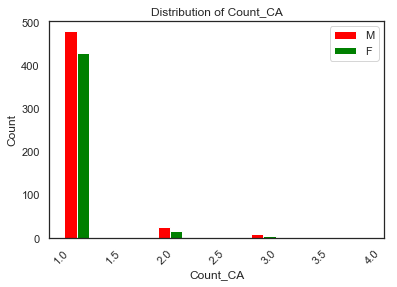

In [23]:
#Data Visualization
#Distribution of Live Current Count
genders=['M','F']
colors = ['red','green']
plt.hist([Target_train.loc[Target_train['Sex'] == x, 'Count_CA'] for x in genders], label=['M','F'], color=colors)
plt.xlabel('Count_CA')
plt.ylabel("Count")
plt.legend(['M','F'])
plt.xticks(rotation=45)
plt.title('Distribution of Count_CA')

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5,1,'Distribution of Count_SA')

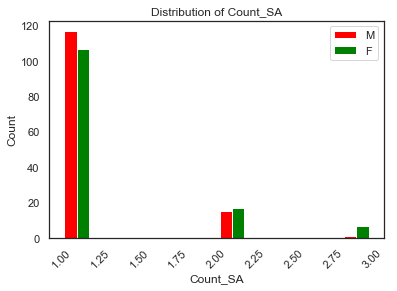

In [24]:
#Data Visualization
#Distribution of Live Saving Accounts
genders=['M','F']
colors = ['red','green']
plt.hist([Target_train.loc[Target_train['Sex'] == x, 'Count_SA'] for x in genders], label=['M','F'], color=colors)
plt.xlabel('Count_SA')
plt.ylabel("Count")
plt.legend(['M','F'])
plt.xticks(rotation=45)
plt.title('Distribution of Count_SA')

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5,1,'Distribution of Count_MF')

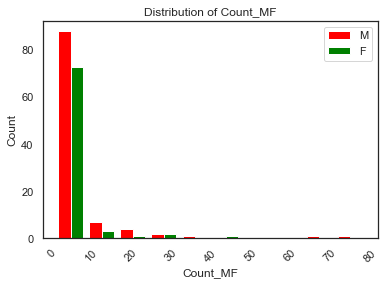

In [25]:
#Data Visualization
#Distribution of Live Mutual Funds
genders=['M','F']
colors = ['red','green']
plt.hist([Target_train.loc[Target_train['Sex'] == x, 'Count_MF'] for x in genders], label=['M','F'], color=colors)
plt.xlabel('Count_MF')
plt.ylabel("Count")
plt.legend(['M','F'])
plt.xticks(rotation=45)
plt.title('Distribution of Count_MF')

In [26]:
# Convert Missing Variables in Mean
features = list(Target_train.columns)
target={'Sex','Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'}
features = [e for e in features if e not in target]
mean = np.mean(pd_new[features],axis=0)

for i, v in enumerate(features):
    Target_train[v]=pd_new[v].replace(np.NaN, 0)
    result[v]=pd_new[v].replace(np.NaN, 0)

In [27]:
# Convert Sex to categrical attributes, which female is 1 and male is 0.
Target_train[['Sex']]=Target_train.Sex.map({'F':1,'M':0})
result[['Sex']]=result.Sex.map({'F':1,'M':0})
# Mark zero for each missing variable or NaN
Target_train[['Count_CA','Count_SA','Count_MF','Count_OVD','Count_CC','Count_CL',
       'ActBal_CA','ActBal_SA','ActBal_MF','ActBal_CC','ActBal_CL','ActBal_OVD']]=pd_new[['Count_CA','Count_SA','Count_MF','Count_OVD','Count_CC','Count_CL',
        'ActBal_CA','ActBal_SA','ActBal_MF','ActBal_CC','ActBal_CL','ActBal_OVD']].replace(np.NaN,-999)
Target_train.drop(["Count_SA","Count_MF","Count_OVD","Count_CC","Count_CL","ActBal_MF","ActBal_SA","ActBal_OVD","ActBal_CC","ActBal_CL"],axis=1,inplace=True)
result.drop(["Count_SA","Count_MF","Count_OVD","Count_CC","Count_CL","ActBal_MF","ActBal_SA","ActBal_OVD","ActBal_CC","ActBal_CL"],axis=1,inplace=True)
# Count missing variable in dataframe
# Target_train[['Sex','VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','TransactionsCred','TransactionsCred_CA',
#             'TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','VolumeDebCash_Card','VolumeDebCashless_Card','VolumeDeb_PaymentOrder',
#              'TransactionsDeb','TransactionsDeb_CA']]=Target_train[['Sex','VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','TransactionsCred','TransactionsCred_CA',
#             'TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','VolumeDebCash_Card','VolumeDebCashless_Card','TransactionsCred_CA','TransactionsDeb','TransactionsDeb_CA']].replace(np.NaN, -1)
# print(Target_train.isnull().sum())

In [28]:
#replace with median and mean 
# Target_train.dropna(inplace=True)
Target_train['Sex']=Target_train['Sex'].replace(np.NaN, -1)
result['Sex']=result['Sex'].replace(np.NaN,-1)
# Target_train[['VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','TransactionsCred','TransactionsCred_CA',
#             'TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','VolumeDebCash_Card','VolumeDebCashless_Card','VolumeDeb_PaymentOrder',
#              'TransactionsDeb','TransactionsDeb_CA']]=Target_train[['VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','TransactionsCred','TransactionsCred_CA',
#             'TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','VolumeDebCash_Card','VolumeDebCashless_Card','TransactionsCred_CA','TransactionsDeb','TransactionsDeb_CA']].replace(np.NaN, np.mean(Target_train[['VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','TransactionsCred','TransactionsCred_CA',
#             'TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','VolumeDebCash_Card','VolumeDebCashless_Card','VolumeDeb_PaymentOrder',
#              'TransactionsDeb','TransactionsDeb_CA']],axis=0))

#Try median
# a=Target_train[['VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','TransactionsCred','TransactionsCred_CA',
#             'TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','VolumeDebCash_Card','VolumeDebCashless_Card','VolumeDeb_PaymentOrder',
#              'TransactionsDeb','TransactionsDeb_CA']]
# b=np.median(a,axis=0)
# c=pd.DataFrame(b)
# Target_train[['VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','TransactionsCred','TransactionsCred_CA',
#             'TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','VolumeDebCash_Card','VolumeDebCashless_Card','VolumeDeb_PaymentOrder',
#              'TransactionsDeb','TransactionsDeb_CA']]=Target_train[['VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','TransactionsCred','TransactionsCred_CA',
#             'TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','VolumeDebCash_Card','VolumeDebCashless_Card','VolumeDeb_PaymentOrder',
#              'TransactionsDeb','TransactionsDeb_CA']].replace(np.NaN, c)
# print(Target_train.isnull().sum())

In [29]:
# a=Target_train[['VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','TransactionsCred','TransactionsCred_CA',
#             'TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','VolumeDebCash_Card','VolumeDebCashless_Card','VolumeDeb_PaymentOrder',
#              'TransactionsDeb','TransactionsDeb_CA']]
# b=np.median(a,axis=0)
# c=pd.DataFrame(b)
# a.replace(np.NaN, c)
# print(a.isnull().sum())
# type(a),type(c)


In [30]:
#Check which two rows are missing
null_data = Target_train[Target_train.isnull().any(axis=1)]
null_data

,Client,Sex,Age,Tenure,Count_CA,ActBal_CA,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL


In [31]:
Target_train.head(5)
result.head(5)

,Client,Sex,Age,Tenure,Count_CA,ActBal_CA,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
2,3,0.0,17,140,1,482.654643,1607.149643,1607.149643,4.0,4.0,...,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.0,24,153,1,1599.840714,1872.483571,1822.589643,9.0,4.0,...,36.0,6.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.0,58,200,1,5353.483929,4372.773929,2964.290357,23.0,14.0,...,41.0,4.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1.0,55,227,1,879.685000,387.504643,387.504643,2.0,2.0,...,10.0,1.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1.0,33,182,1,510.166429,527.175000,379.791071,6.0,4.0,...,7.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Description
Target_train.describe()

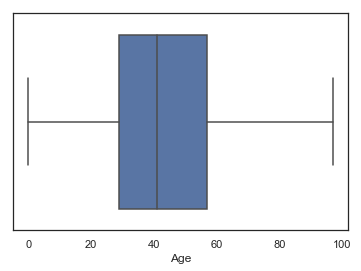

In [32]:
# Boxplot for age
g1 = sns.boxplot(x=Target_train["Age"])

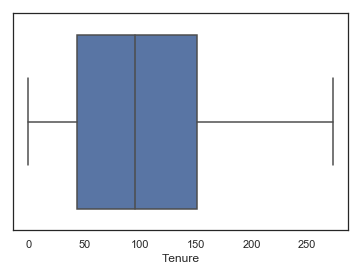

In [33]:
#Distribution of Tenure
g2 = sns.boxplot(x=Target_train["Tenure"])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


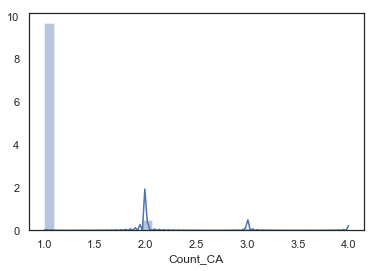

In [34]:
# Distribution of Current Accounts
g3 = sns.distplot(Target_train["Count_CA"])

In [35]:
# # Distribution of live saving Accounts
# g3 = plt.hist(Target_train["Count_SA"],bins=5)

In [36]:
# # Distribution of live mutual funds
# g3 = plt.hist(Target_train["Count_MF"],bins=30)

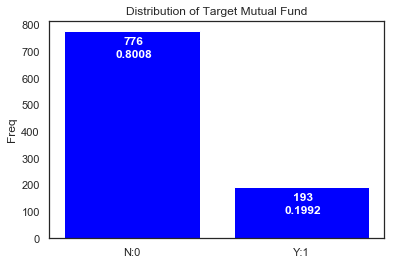

In [37]:
# Distribution of Target Mutual Fund
height = Target_train.groupby('Sale_MF').size()
fig, ax = plt.subplots()
width = 0.45
bins=['N:0','Y:1']
x = np.arange(len(bins))
# plt.bar(height=C_Sex)
ax.bar(x, height,color = 'blue')
ax.set_xticks(x)
ax.set_xticklabels(bins, minor=False)
ax.set_title('Distribution of Target Mutual Fund')
ax.set_xticklabels(bins)
ax.set_ylabel('Freq')
for i, v in enumerate(height):
    s=round(v/(height[0]+height[1]),4)
    ax.text(i-0.05, v-50,str(v),color='w', fontweight='bold')
    ax.text(i-0.1, v-100,str(s),color='w',fontweight='bold')

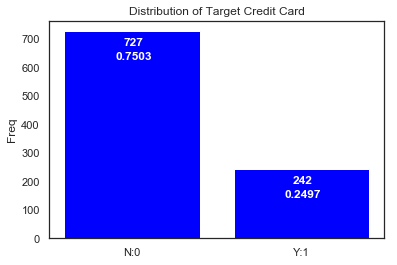

In [38]:
# Distribution of live Sale of Sale of credit card
height = Target_train.groupby('Sale_CC').size()
fig, ax = plt.subplots()
width = 0.45
bins=['N:0','Y:1']
x = np.arange(len(bins))
# plt.bar(height=C_Sex)
ax.bar(x, height,color = 'blue')
ax.set_xticks(x)
ax.set_xticklabels(bins, minor=False)
ax.set_title('Distribution of Target Credit Card')
ax.set_xticklabels(bins)
ax.set_ylabel('Freq')
for i, v in enumerate(height):
    s=round(v/(height[0]+height[1]),4)
    ax.text(i-0.05, v-50,str(v),color='w', fontweight='bold')
    ax.text(i-0.1, v-100,str(s),color='w',fontweight='bold')

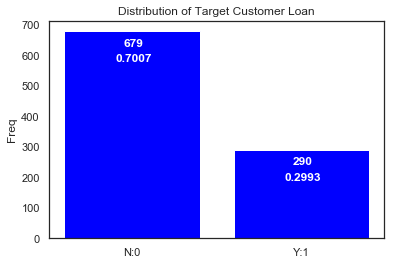

In [39]:
# Distribution of live Sale of Sale Customer Loan
height = Target_train.groupby('Sale_CL').size()
fig, ax = plt.subplots()
width = 0.45
bins=['N:0','Y:1']
x = np.arange(len(bins))
# plt.bar(height=C_Sex)
ax.bar(x, height,color = 'blue')
ax.set_xticks(x)
ax.set_xticklabels(bins, minor=False)
ax.set_title('Distribution of Target Customer Loan')
ax.set_xticklabels(bins)
ax.set_ylabel('Freq')
for i, v in enumerate(height):
    s=round(v/(height[0]+height[1]),4)
    ax.text(i-0.05, v-50,str(v),color='w', fontweight='bold')
    ax.text(i-0.1, v-100,str(s),color='w',fontweight='bold')

In [40]:
# XGboost
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [41]:
features = list(Target_train.columns)
print(Target_train.shape)

(969, 26)


In [42]:
target={'Client','Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'}
features = [e for e in features if e not in target]
len(features)

19

In [43]:
x = Target_train[features]
y = Target_train[['Sale_MF','Sale_CC','Sale_CL']]

In [44]:
# Check missing variables
# print(x.isnull().sum())
# Drop the missing variables
print(x.isnull().count())

Sex                             969
Age                             969
Tenure                          969
Count_CA                        969
ActBal_CA                       969
VolumeCred                      969
VolumeCred_CA                   969
TransactionsCred                969
TransactionsCred_CA             969
VolumeDeb                       969
VolumeDeb_CA                    969
VolumeDebCash_Card              969
VolumeDebCashless_Card          969
VolumeDeb_PaymentOrder          969
TransactionsDeb                 969
TransactionsDeb_CA              969
TransactionsDebCash_Card        969
TransactionsDebCashless_Card    969
TransactionsDeb_PaymentOrder    969
dtype: int64


In [45]:
# Split data in train and test(80% of data for training and 20% for testing).
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
# Oversampling for features and target variable Sale_MF
sm = SMOTE(random_state=42, ratio=1.0)
os_x_train, os_y_train=sm.fit_sample(x_train,y_train['Sale_MF'])
print(y_train['Sale_MF'].value_counts(),np.bincount(os_y_train))

0    622
1    153
Name: Sale_MF, dtype: int64 [622 622]


In [47]:
os_x_train= np.asmatrix(os_x_train)
x_test=np.asmatrix(x_test)

In [48]:
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=42, 
       silent=True, subsample=0.8, base_score = 0.5)   
xgb1.fit(os_x_train, os_y_train)
y_pred= xgb1.predict(x_test)

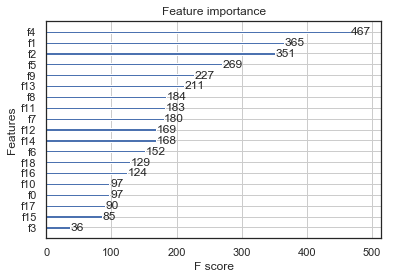

In [49]:
plot_importance(xgb1)
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(xgb1, os_x_train, os_y_train, cv=3, scoring="accuracy"))

[0.69951923 0.93961353 0.93719807]


In [51]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test['Sale_MF'], y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[134  20]
 [ 35   5]]


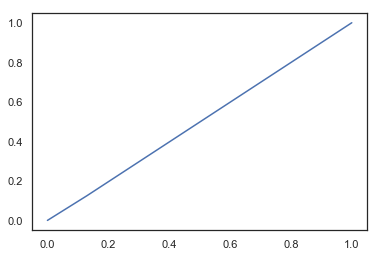

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test['Sale_MF'], y_pred)
plt.plot(fpr, tpr)
plt.show()

In [53]:
from sklearn.metrics import recall_score
recall = recall_score(y_test['Sale_MF'], y_pred)
print("Recall Rate:", recall)

Recall Rate: 0.125


In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test['Sale_MF'], y_pred)
print("Accuracy Rate:", accuracy)

Accuracy Rate: 0.7164948453608248


In [55]:
from sklearn.metrics import roc_auc_score
print('Area under the curve:', roc_auc_score(y_test['Sale_MF'],y_pred))


Area under the curve: 0.49756493506493504


In [56]:
# Oversampling for features and target variable Sale_MF
sm = SMOTE(random_state=12, ratio=1.0)
os_x_train, os_y_train=sm.fit_sample(x_train,y_train['Sale_CC'])
print(y_train['Sale_CC'].value_counts(),np.bincount(os_y_train))
os_x_train= np.asmatrix(os_x_train)
x_test=np.asmatrix(x_test)

0    582
1    193
Name: Sale_CC, dtype: int64 [582 582]


In [57]:
from xgboost.sklearn import XGBClassifier
xgb2 = XGBClassifier(
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=42, 
       silent=True, subsample=0.8, base_score = 0.5)   


In [58]:
# Test the model
xgb2.fit(os_x_train, os_y_train)
y_pred= xgb2.predict(x_test)

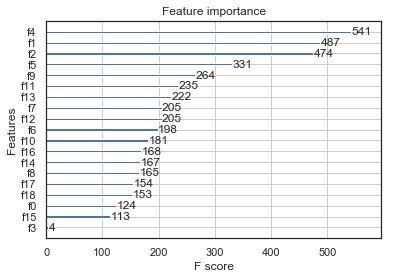

In [59]:
plot_importance(xgb2)
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(xgb2, os_x_train, os_y_train, cv=3, scoring="accuracy"))

[0.56443299 0.85824742 0.87886598]


In [61]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test['Sale_CC'], y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[125  20]
 [ 41   8]]


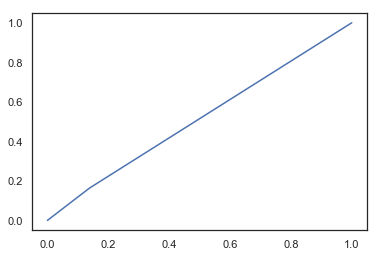

In [62]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test['Sale_CC'], y_pred)
plt.plot(fpr, tpr)
plt.show()


In [63]:
from sklearn.metrics import recall_score
recall = recall_score(y_test['Sale_CC'], y_pred)
print("Recall Rate:", recall)

Recall Rate: 0.16326530612244897


In [64]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test['Sale_CC'], y_pred)
print("Accuracy Rate:", accuracy)

Accuracy Rate: 0.6855670103092784


In [65]:
from sklearn.metrics import roc_auc_score
print('Area under the curve:', roc_auc_score(y_test['Sale_MF'],y_pred))

Area under the curve: 0.5035714285714286


In [66]:
# Oversampling for features and target variable Sale_MF
sm = SMOTE(random_state=12, ratio=1.0)
os_x_train, os_y_train=sm.fit_sample(x_train,y_train['Sale_CL'])
print(y_train['Sale_CL'].value_counts(),np.bincount(os_y_train))
os_x_train= np.asmatrix(os_x_train)
x_test=np.asmatrix(x_test)

0    539
1    236
Name: Sale_CL, dtype: int64 [539 539]


In [67]:
from xgboost.sklearn import XGBClassifier
xgb3 = XGBClassifier(
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=42, 
       silent=True, subsample=0.8, base_score = 0.5)  

In [68]:
# Use the model to predict the rest 40% clients
xgb3.fit(os_x_train, os_y_train)
y_pred= xgb3.predict(x_test)

In [69]:
x_test.shape

(194, 19)

In [70]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(xgb3, os_x_train, os_y_train, cv=3, scoring="accuracy"))

[0.58888889 0.75277778 0.76815642]


In [71]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test['Sale_CL'], y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[108  32]
 [ 42  12]]


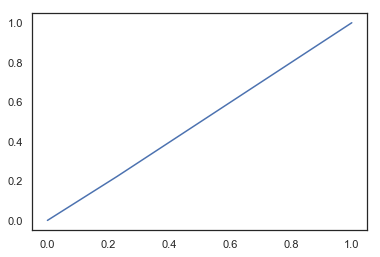

In [72]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test['Sale_CL'], y_pred)
plt.plot(fpr, tpr)
plt.show()

In [73]:
from sklearn.metrics import recall_score
recall = recall_score(y_test['Sale_CL'], y_pred)
print("Recall Rate:", recall)

Recall Rate: 0.2222222222222222


In [74]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test['Sale_CL'], y_pred)
print("Accuracy Rate:", accuracy)

Accuracy Rate: 0.6185567010309279


In [75]:
from sklearn.metrics import roc_auc_score
print('Area under the curve:', roc_auc_score(y_test['Sale_CL'],y_pred))

Area under the curve: 0.4968253968253969


In [76]:
result.columns

Index(['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'ActBal_CA', 'VolumeCred',
       'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',
       'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL'],
      dtype='object')

In [77]:
result.drop(['Sale_CC','Sale_CL','Sale_MF','Revenue_MF', 'Revenue_CC', 'Revenue_CL'],axis=1,inplace=True)

In [78]:
result.isnull().sum()

Client                          0
Sex                             0
Age                             0
Tenure                          0
Count_CA                        0
ActBal_CA                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
TransactionsDeb_CA              0
TransactionsDebCash_Card        0
TransactionsDebCashless_Card    0
TransactionsDeb_PaymentOrder    0
dtype: int64

In [79]:
# XGBoost Model MF
result_new=np.asmatrix(result.iloc[:,1:])
y_pred_new= xgb1.predict(result_new)

In [80]:
np.count_nonzero(y_pred_new == 1), np.count_nonzero(y_pred_new == 0)

(90, 556)

In [81]:
# Probability
probablity = xgb1.predict_proba(result_new)

In [82]:
pd.DataFrame(probablity).describe()

,0,1
count,646.000000,646.000000
mean,0.787748,0.212253
std,0.231955,0.231955
min,0.070230,0.007624
25%,0.703613,0.049775
50%,0.887154,0.112846
75%,0.950225,0.296387
max,0.992376,0.929770


In [83]:
# Output result and index to csv
index = np.array(result['Client']).reshape((-1,1))[:,0:1]
output = pd.DataFrame(np.column_stack((index.reshape(-1,1),np.array(y_pred_new).reshape(-1,1),np.array(probablity[:,1]).reshape(-1,1))),columns=['Client','predict_lable','probablity'])
# output.to_csv('/Users/leono1/Desktop/result/xgb1_result_MF.csv',index=False, header=True,encoding='gbk')

In [84]:
output

,Client,predict_lable,probablity
0,3.0,0.0,0.044170
1,4.0,0.0,0.072640
2,5.0,0.0,0.078720
3,7.0,0.0,0.041638
4,9.0,0.0,0.048740
5,10.0,0.0,0.164458
6,11.0,0.0,0.091007
7,12.0,0.0,0.027228
8,16.0,0.0,0.154477
9,18.0,1.0,0.593230


In [85]:
# XGBoost Model2 CC
result_new=np.asmatrix(result.iloc[:,1:])
y_pred_new= xgb2.predict(result_new)
np.count_nonzero(y_pred_new == 1), np.count_nonzero(y_pred_new == 0)
# Probability
probablity = xgb2.predict_proba(result_new)
# Output result and index to csv
index = np.array(result['Client']).reshape((-1,1))[:,0:1]
output = pd.DataFrame(np.column_stack((index.reshape(-1,1),np.array(y_pred_new).reshape(-1,1),np.array(probablity[:,0]).reshape(-1,1))),columns=['Client','predict_lable','probablity'])
# output.to_csv('/Users/leono1/Desktop/result/xgb2_result_CC.csv',index=False, header=True,encoding='gbk')

In [86]:
# XGBoost Model3 MF
result_new=np.asmatrix(result.iloc[:,1:])
y_pred_new= xgb3.predict(result_new)
np.count_nonzero(y_pred_new == 1), np.count_nonzero(y_pred_new == 0)
# Probability
probablity = xgb3.predict_proba(result_new)
# Output result and index to csv
index = np.array(result['Client']).reshape((-1,1))[:,0:1]
output = pd.DataFrame(np.column_stack((index.reshape(-1,1),np.array(y_pred_new).reshape(-1,1),np.array(probablity[:,0]).reshape(-1,1))),columns=['Client','predict_lable','probablity'])
# output.to_csv('/Users/leono1/Desktop/result/xgb3_result_CL.csv',index=False, header=True,encoding='gbk')